In [60]:
import pickle
import pandas as pd
X_train = pd.read_csv('../data/X_train_trans2.csv', index_col=0)
pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

In [150]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charge,x0_415,x0_510,x1_yes,x2_yes
0,-1.508366,1.658110,0.832457,-1.530204,0.832508,-1.310525,-0.972401,-1.311142,-1.616872,0.193381,...,0.224309,-0.981136,-0.426884,-1.152825,-1.331638,-0.219875,0.0,0.0,0.0,1.0
1,0.432612,-0.592293,0.808653,-0.097455,0.808811,0.379882,0.040214,0.379595,0.056732,0.913424,...,0.633467,-1.416169,-1.191800,0.685933,0.526322,0.774870,0.0,1.0,1.0,0.0
2,-0.264149,-0.592293,-0.061110,0.544812,-0.061490,1.648178,0.749044,1.647648,-1.006287,1.119150,...,1.042625,0.969925,-0.426884,0.363710,1.455301,0.475691,1.0,0.0,0.0,0.0
3,-0.264149,-0.592293,-0.617759,-0.393886,-0.617276,0.322946,0.698414,0.321851,-1.084361,1.170582,...,-1.003165,0.218503,1.102947,-0.778915,0.758566,-0.623814,1.0,0.0,0.0,0.0
4,0.581918,-0.592293,-0.181961,0.396596,-0.182125,-0.444707,-0.466094,-0.444986,0.825468,-0.938114,...,-0.594007,0.679902,-0.426884,0.116270,-0.605873,-0.117947,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,-0.363687,-0.592293,-1.753029,-0.196265,-1.752545,0.389698,-1.883755,0.388834,2.975528,-1.298135,...,-0.594007,0.824914,-1.191800,0.825599,-1.970312,-0.686103,1.0,0.0,0.0,0.0
2329,0.407728,-0.592293,1.110782,-0.789127,1.110401,-0.519313,0.293368,-0.518898,0.168839,-0.372367,...,-1.003165,-0.163799,-1.191800,0.463786,-0.576842,0.785251,0.0,0.0,0.0,0.0
2330,0.606802,-0.592293,-0.771569,-0.295075,-0.771302,0.167845,-0.871140,0.167098,0.747393,0.707697,...,-0.184849,-0.598833,-0.426884,0.022792,-0.286536,-0.491684,0.0,0.0,0.0,0.0
2331,-0.911142,1.367735,0.403984,0.050760,0.403820,-1.127938,-0.567355,-1.128672,-1.018298,1.376308,...,-0.594007,0.719451,-0.426884,-0.926279,0.439230,-0.271783,1.0,0.0,0.0,1.0


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

### Vanilla GBC is the best model 
#### Scores:
- accuracy score: 0.982426060865838
- recall: 0.878698224852071
- precision: 1.0
- CV precision: .993
- f1: 0.9354330708661417

#### Top 3 features:
- total charge
- number of customer service calls
- having an international plan

In [172]:
from sklearn.model_selection import train_test_split

In [169]:
gbc = GradientBoostingClassifier()

In [170]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [173]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, stratify = y_train, test_size=0.2, random_state=3)

In [175]:
gbc_2 = GradientBoostingClassifier()
gbc_2.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [179]:
y_test_pred2 = gbc_2.predict(X_test2)

Confusion Matrix, without normalization
[[399   0]
 [  9  59]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       399
           1       1.00      0.87      0.93        68

    accuracy                           0.98       467
   macro avg       0.99      0.93      0.96       467
weighted avg       0.98      0.98      0.98       467



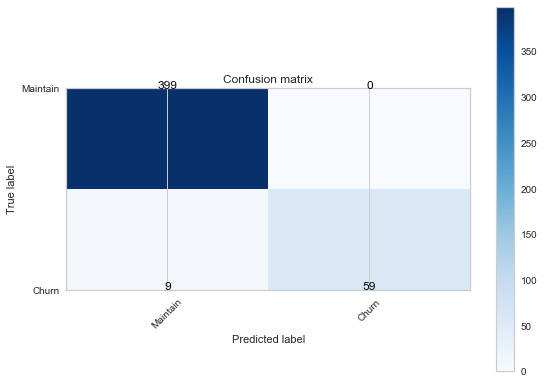

In [181]:
cm = confusion_matrix(y_test2, y_test_pred2)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_test2, y_test_pred2))

In [87]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [88]:
y_pred = gbc.predict(X_train)
print ('accuracy score:', gbc.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy score: 0.982426060865838
recall: 0.878698224852071
precision: 1.0
f1: 0.9354330708661417


#### Confusion Matrix

In [65]:
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[1995    0]
 [  41  297]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.88      0.94       338

    accuracy                           0.98      2333
   macro avg       0.99      0.94      0.96      2333
weighted avg       0.98      0.98      0.98      2333



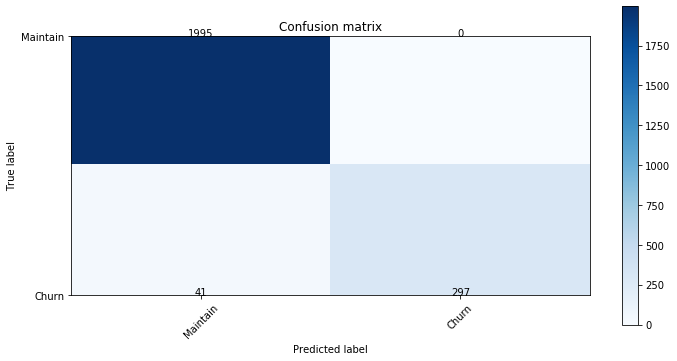

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

y_pred = gbc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))

#### Cross-validation 

In [67]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(gbc, X_train, y_train, cv=5, scoring= 'precision')
np.average(scores1)

1.0

#### Feature importances

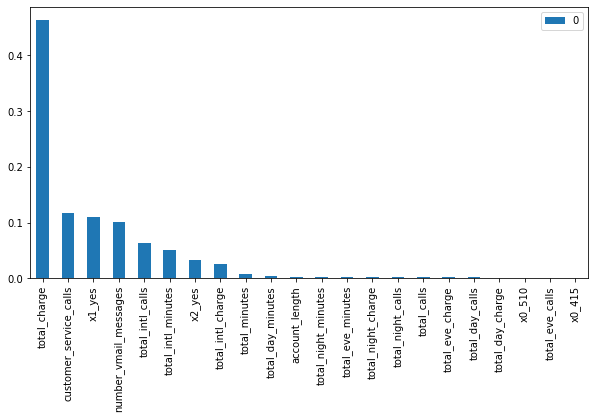

In [86]:
importances1 = list(zip(gbc.feature_importances_, X_train.columns))
importances1.sort(reverse=True)
pd.DataFrame(importances1, index=[x for (_,x) in importances]).plot(kind = 'bar')

### Gridsearch for hyperparamter tunning

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
gbc2 = GradientBoostingClassifier()

n_estimator = range(1, 50, 5)

max_depth_params = range(1,8)

max_features_param = [None, 'auto', 'sqrt', 'log2']

param_grid = {'n_estimators': n_estimator, 'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = (GridSearchCV(estimator = gbc2, 
                          param_grid = param_grid,
                          n_jobs = -1, #parallel computation
                          verbose = 1, #give feedback
                          cv = 10, #cross-validate 10 times
                          scoring = 'precision', #can use multiple scoring  , recall, precision..ect
                          return_train_score= True))
# X = MultipleArray(low_sig, None)
# gridsearch.fit(X)
gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1214 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1914 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 2468 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:   53.1s finished


In [121]:
gridsearch.best_score_

1.0

In [123]:
gridsearch.cv_results_;

In [125]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

results = pd.DataFrame(gridsearch.cv_results_)[colums]
df = results.sort_values(by = 'rank_test_score').head(10)

In [126]:
pd.options.display.max_colwidth = 100
df

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
231,"{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 6}",1.0,0.0,1,1.0,0.0
57,"{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 36}",1.0,0.0,1,1.0,0.0
141,"{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 6}",1.0,0.0,1,1.0,0.0
225,"{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 26}",1.0,0.0,1,1.0,0.0
154,"{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 21}",1.0,0.0,1,1.0,0.0
226,"{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}",1.0,0.0,1,1.0,0.0
152,"{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 11}",1.0,0.0,1,1.0,0.0
151,"{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 6}",1.0,0.0,1,1.0,0.0
196,"{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 31}",1.0,0.0,1,1.0,0.0
52,"{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 11}",1.0,0.0,1,1.0,0.0


In [127]:
results.shape

(280, 6)

(0.9, 1.1)

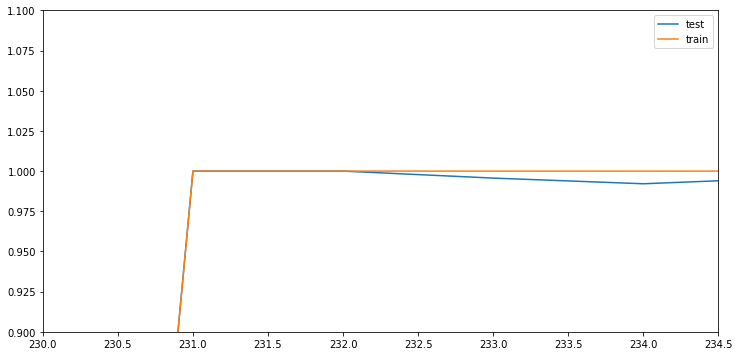

In [149]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(280), roc_test_scores, label = 'test')
plt.plot(range(280), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()
ax = plt.subplot()
ax.set_xlim(230,234.5)
ax.set_ylim(.9,1.1)


### Tested different parameters below
The gbc2 model fits well but not better than the default (vanilla) model

In [159]:
gbc2 = GradientBoostingClassifier(n_estimators=36, max_depth =2, max_features = 'auto' )

In [160]:
gbc2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=36,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [161]:
y_pred2 = gbc2.predict(X_train)
print ('accuracy score:', gbc2.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred2))
print ('precision:', precision_score(y_train, y_pred2))
print ('f1:', f1_score(y_train, y_pred2))

accuracy score: 0.9502786112301758
recall: 0.6568047337278107
precision: 1.0
f1: 0.7928571428571429


Confusion Matrix, without normalization
[[1995    0]
 [ 116  222]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1995
           1       1.00      0.66      0.79       338

    accuracy                           0.95      2333
   macro avg       0.97      0.83      0.88      2333
weighted avg       0.95      0.95      0.95      2333



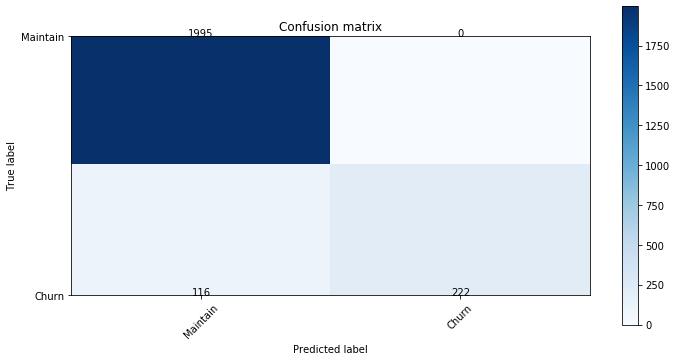

In [162]:
y_pred2 = gbc2.predict(X_train)
cm1 = confusion_matrix(y_train, y_pred2)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm1, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred2))

In [163]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(gbc2, X_train, y_train, cv=5, scoring= 'precision')
np.average(scores2)

1.0

In [156]:
# plot_importance(gbc2)
# pyplot.show()

In [157]:
importances = list(zip(gbc2.feature_importances_, X_train.columns))
importances.sort(reverse=True)

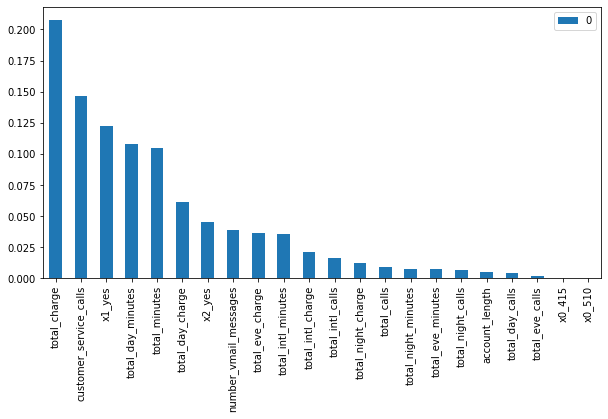

In [158]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')